In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Explore data

# Corrected path to match workspace structure
consumption_data = pd.read_csv('../src/paraguay/electricity-consumption-raw.csv')
consumption_data.info()

#grab first 10000 rows
consumption_data = consumption_data.head(10000)

# Further analysis could include checking for missing values, outliers, and seasonal patterns.
max_value = consumption_data['consumption'].max()
min_value = consumption_data['consumption'].min()
mean_value = consumption_data['consumption'].mean()
std_dev = consumption_data['consumption'].std()

#print out all info
print("\n")
print(f"We have the following statistics for electricity consumption:")
print(f"Max Consumption: {max_value}")
print(f"Min Consumption: {min_value}")
print(f"Mean Consumption: {mean_value}")
print(f"Standard Deviation: {std_dev}")


# Check for missing in datetime
missing_values = consumption_data['datetime'].isnull().sum()
print(f"Missing values in 'datetime': {missing_values}")


FileNotFoundError: [Errno 2] No such file or directory: '../src/paraguay/electricity-consumption-raw.csv'

# Alternative Time Series Visualization Methods

Here are different ways to visualize time series data, each highlighting different aspects of the data.

Before resampling:
Number of records: 10000
Time range: 2017-01-01 00:00:00 to 2018-02-22 15:00:00
Columns: ['datetime', 'substation', 'feeder', 'consumption']

After hourly resampling:
Number of records: 10024
Time range: 2017-01-01 00:00:00 to 2018-02-22 15:00:00
Columns: ['datetime', 'consumption']


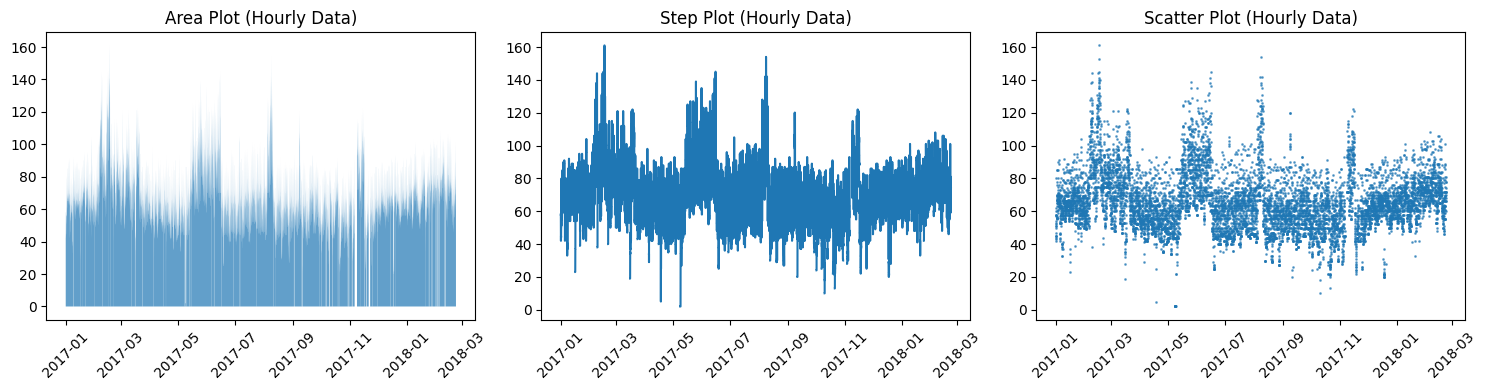

In [ ]:
# First, ensure datetime column is properly formatted
consumption_data['datetime'] = pd.to_datetime(consumption_data['datetime'])

# Convert to daily data - RESAMPLING TO DAILY FREQUENCY
print("Before resampling:")
print(f"Number of records: {len(consumption_data)}")
print(f"Time range: {consumption_data['datetime'].min()} to {consumption_data['datetime'].max()}")
print(f"Columns: {list(consumption_data.columns)}")

# Set datetime as index (required for resampling)
consumption_data.set_index('datetime', inplace=True)

# SOLUTION: Only resample numeric columns, handle string columns separately
# Resample to daily frequency using mean aggregation
consumption_daily = consumption_data[['consumption']].resample('D').mean().reset_index()

print("\nAfter daily resampling:")
print(f"Number of records: {len(consumption_daily)}")
print(f"Time range: {consumption_daily['datetime'].min()} to {consumption_daily['datetime'].max()}")
print(f"Columns: {list(consumption_daily.columns)}")

# Use the resampled data for plotting
plot_data = consumption_daily

# 1. AREA PLOT - Shows volume under the curve
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.fill_between(plot_data['datetime'], plot_data['consumption'], alpha=0.7)
plt.title('Area Plot (Daily Data)')
plt.xticks(rotation=45)

# 2. STEP PLOT - Shows discrete changes
plt.subplot(1, 3, 2)
plt.step(plot_data['datetime'], plot_data['consumption'], where='mid')
plt.title('Step Plot (Daily Data)')
plt.xticks(rotation=45)

# 3. SCATTER PLOT - Good for identifying patterns/outliers
plt.subplot(1, 3, 3)
plt.scatter(plot_data['datetime'], plot_data['consumption'], alpha=0.8, s=20)
plt.title('Scatter Plot (Daily Data)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Update consumption_data for use in subsequent cells
consumption_data = consumption_daily

## Different Ways to Resample Time Series to Hourly

You can choose different aggregation methods depending on what makes sense for your data:

In [ ]:
# Load fresh data to show different resampling methods
data_demo = pd.read_csv('../src/paraguay/electricity-consumption-raw.csv')
data_demo['datetime'] = pd.to_datetime(data_demo['datetime'])
data_demo = data_demo.tail(1000)  # Use subset for demo

print("Original data frequency:")
print(f"Number of records: {len(data_demo)}")
print(f"Time range: {data_demo['datetime'].min()} to {data_demo['datetime'].max()}")
print(f"Time difference between first two records: {data_demo['datetime'].iloc[1] - data_demo['datetime'].iloc[0]}")

# Set datetime as index for resampling
data_demo.set_index('datetime', inplace=True)

# Different aggregation methods for hourly resampling:
print("\n" + "="*50)
print("DIFFERENT HOURLY RESAMPLING METHODS:")
print("="*50)

# 1. MEAN (average) - What you're already using
hourly_mean = data_demo.resample('H').mean()
print(f"1. MEAN: {len(hourly_mean)} hourly records")

# 2. SUM - Total consumption per hour
hourly_sum = data_demo.resample('H').sum()
print(f"2. SUM: {len(hourly_sum)} hourly records")

# 3. MAX - Peak consumption per hour
hourly_max = data_demo.resample('H').max()
print(f"3. MAX: {len(hourly_max)} hourly records")

# 4. MIN - Minimum consumption per hour
hourly_min = data_demo.resample('H').min()
print(f"4. MIN: {len(hourly_min)} hourly records")

# 5. FIRST - First value in each hour
hourly_first = data_demo.resample('H').first()
print(f"5. FIRST: {len(hourly_first)} hourly records")

# 6. LAST - Last value in each hour
hourly_last = data_demo.resample('H').last()
print(f"6. LAST: {len(hourly_last)} hourly records")

# 7. COUNT - Number of observations per hour
hourly_count = data_demo.resample('H').count()
print(f"7. COUNT: Shows how many readings per hour")

# 8. CUSTOM AGGREGATION - Multiple stats at once
hourly_agg = data_demo.resample('H').agg({
    'consumption': ['mean', 'sum', 'max', 'min', 'count']
})
print(f"8. CUSTOM: Multiple aggregations in one go")

Original data frequency:
Number of records: 1000
Time range: 2020-09-25 08:00:00 to 2020-11-05 23:00:00
Time difference between first two records: 0 days 01:00:00

DIFFERENT HOURLY RESAMPLING METHODS:


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Visualize the difference between aggregation methods
plt.figure(figsize=(15, 10))

# Reset indices for plotting
hourly_mean_plot = hourly_mean.reset_index()
hourly_sum_plot = hourly_sum.reset_index()
hourly_max_plot = hourly_max.reset_index()

# Show first 48 hours (2 days) for clarity
hours_to_show = 48
if len(hourly_mean_plot) >= hours_to_show:
    
    plt.subplot(2, 2, 1)
    plt.plot(hourly_mean_plot['datetime'][:hours_to_show], 
             hourly_mean_plot['consumption'][:hours_to_show], 
             marker='o', label='Hourly Mean')
    plt.title('Hourly Mean Consumption')
    plt.xticks(rotation=45)
    plt.ylabel('Consumption (kWh)')
    
    plt.subplot(2, 2, 2)
    plt.plot(hourly_sum_plot['datetime'][:hours_to_show], 
             hourly_sum_plot['consumption'][:hours_to_show], 
             marker='s', color='orange', label='Hourly Sum')
    plt.title('Hourly Total Consumption')
    plt.xticks(rotation=45)
    plt.ylabel('Total Consumption (kWh)')
    
    plt.subplot(2, 2, 3)
    plt.plot(hourly_max_plot['datetime'][:hours_to_show], 
             hourly_max_plot['consumption'][:hours_to_show], 
             marker='^', color='red', label='Hourly Max')
    plt.title('Hourly Peak Consumption')
    plt.xticks(rotation=45)
    plt.ylabel('Peak Consumption (kWh)')
    
    # Compare all three on same plot
    plt.subplot(2, 2, 4)
    plt.plot(hourly_mean_plot['datetime'][:hours_to_show], 
             hourly_mean_plot['consumption'][:hours_to_show], 
             marker='o', label='Mean', alpha=0.7)
    plt.plot(hourly_sum_plot['datetime'][:hours_to_show], 
             hourly_sum_plot['consumption'][:hours_to_show], 
             marker='s', label='Sum', alpha=0.7)
    plt.plot(hourly_max_plot['datetime'][:hours_to_show], 
             hourly_max_plot['consumption'][:hours_to_show], 
             marker='^', label='Max', alpha=0.7)
    plt.title('Comparison of Aggregation Methods')
    plt.xticks(rotation=45)
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for visualization. Only {len(hourly_mean_plot)} hours available.")

NameError: name 'hourly_mean' is not defined

<Figure size 1500x1000 with 0 Axes>

## Other Time Frequencies You Can Use:

**Pandas resample frequency codes:**
- `'T'` or `'min'` - Minutes
- `'H'` - Hours (what you're using)
- `'D'` - Days
- `'W'` - Weeks  
- `'M'` - Months
- `'Q'` - Quarters
- `'Y'` - Years

**Examples:**
- `'15T'` - Every 15 minutes
- `'2H'` - Every 2 hours
- `'3D'` - Every 3 days

## Which Aggregation Method to Choose?

- **Mean**: Good for understanding average consumption patterns
- **Sum**: Best for total energy consumed per period
- **Max**: Useful for peak demand analysis
- **Min**: Good for identifying minimum baseline consumption
- **Count**: Helps identify data quality issues (missing readings)

KeyError: 'datetime'

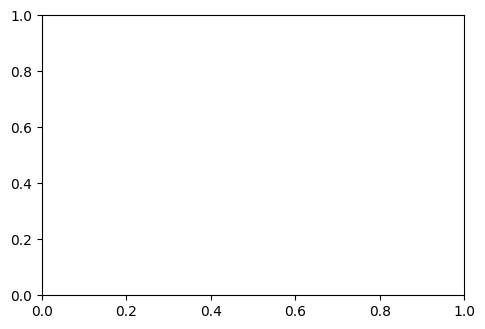

In [ ]:
# 4. MOVING AVERAGE - Smooths out short-term fluctuations
plt.figure(figsize=(12, 8))

# Calculate rolling averages
consumption_data['MA_7'] = consumption_data['consumption'].rolling(window=7).mean()
consumption_data['MA_30'] = consumption_data['consumption'].rolling(window=30).mean()

plt.subplot(2, 2, 1)
plt.plot(consumption_data['datetime'], consumption_data['consumption'], alpha=0.3, label='Original')
plt.plot(consumption_data['datetime'], consumption_data['MA_7'], label='7-day MA')
plt.plot(consumption_data['datetime'], consumption_data['MA_30'], label='30-day MA')
plt.title('Moving Averages')
plt.legend()
plt.xticks(rotation=45)

# 5. BOX PLOT BY TIME PERIOD (if you have enough data)
# Group by month or day of week
consumption_data['month'] = consumption_data['datetime'].dt.month
plt.subplot(2, 2, 2)
consumption_data.boxplot(column='consumption', by='month', ax=plt.gca())
plt.title('Consumption by Month')
plt.suptitle('')  # Remove default title

# 6. HISTOGRAM - Shows distribution of values
plt.subplot(2, 2, 3)
plt.hist(consumption_data['consumption'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Consumption Distribution')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')

# 7. HEATMAP (if you have seasonal patterns)
# Create hour and day columns for heatmap
consumption_data['hour'] = consumption_data['datetime'].dt.hour
consumption_data['day'] = consumption_data['datetime'].dt.day_of_week

# Pivot for heatmap
heatmap_data = consumption_data.pivot_table(values='consumption', 
                                          index='hour', 
                                          columns='day', 
                                          aggfunc='mean')
plt.subplot(2, 2, 4)
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Avg Consumption'})
plt.title('Consumption Heatmap (Hour vs Day of Week)')
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week (0=Monday)')

plt.tight_layout()
plt.show()

In [ ]:
# 8. INTERACTIVE PLOT with Plotly (if you have plotly installed)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    # Simple interactive line plot
    fig = px.line(consumption_data, x='datetime', y='consumption', 
                  title='Interactive Electricity Consumption Over Time')
    fig.update_layout(xaxis_title='Date', yaxis_title='Consumption (kWh)')
    fig.show()
    
    # Interactive plot with range selector
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=consumption_data['datetime'], 
                            y=consumption_data['consumption'],
                            mode='lines',
                            name='Consumption'))
    
    fig.update_layout(
        title='Consumption with Range Selector',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=7, label="7d", step="day", stepmode="backward"),
                    dict(count=30, label="30d", step="day", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )
    fig.show()
    
except ImportError:
    print("Plotly not installed. Install with: pip install plotly")
    print("Skipping interactive plots...")

## Summary of Time Series Visualization Methods:

1. **Area Plot** - Good for showing volume/magnitude over time
2. **Step Plot** - Emphasizes discrete changes, good for data that changes in steps
3. **Scatter Plot** - Helps identify outliers and patterns in the relationship
4. **Moving Averages** - Smooths data to show trends, removes noise
5. **Box Plots by Time Period** - Shows distribution and outliers across time periods
6. **Histogram** - Shows the distribution of consumption values
7. **Heatmap** - Great for showing patterns across two time dimensions (hour vs day)
8. **Interactive Plots** - Allow zooming, panning, and detailed exploration

**Choose based on your analysis goals:**
- **Trends**: Line plots, moving averages
- **Patterns**: Heatmaps, box plots by time period  
- **Outliers**: Scatter plots, box plots
- **Distribution**: Histograms
- **Exploration**: Interactive plots